In [1]:
from brainmri.dataset.stacker import MriStacker
from brainmri.dataset.dataset import *
from brainmri.runner.train import train_model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import segmentation_models_pytorch as smp

In [2]:
config = {
     'make_stacks': True,
     'stack_size': 3,
     'data_dir': './data/lgg-mri-segmentation/kaggle_3m/',
     'out_dir': './data/lgg-mri-segmentation/2.5D/StackSize=3',
     'model_out_pth': './models/fpn-resnet50_aug_{date}.pth',
     'augmentations': True,
     'epochs': 75,
     'batch_size': 64,
     'lr': 5e-05,
     'optimizer': 'adam',
     'model': 'fpn',
     'model_encoder': 'resnet50',
     'model_act': 'sigmoid',
     'encoder_weights': 'imagenet',
     'device': 'cuda',
     'num_classes': 1
}

In [3]:
stacker = MriStacker(root_dir=config.get("data_dir"),
                         out_dir=config.get("out_dir"),
                         stack_size=config.get("stack_size"))

if config.get("make_stacks"):
    stacker.process_patients()

stacker.gen_train_val_test_split()


preprocessing_fn = get_preprocessing_fn(config.get("model_encoder"), config.get("encoder_weights"))
train_ds = BrainMriSegmentation(stacker.train_df, config.get("stack_size"),
                                transforms=get_augmentations(is_train=True, apply_transforms=config.get("augmentations")),
                                preprocessing=get_preprocessing(preprocessing_fn))
valid_ds = BrainMriSegmentation(stacker.valid_df, config.get("stack_size"),
                                transforms=None, preprocessing=get_preprocessing(preprocessing_fn))

train_dl = get_dataloader(train_ds, bs=config.get("batch_size"))
valid_dl = get_dataloader(valid_ds, bs=config.get("batch_size"))

train_loss, val_loss, train_fscore, val_fscore, train_iou, val_iou  = train_model(config, train_dl, valid_dl)


/home/nlittlefield/.local/lib/python3.6/site-packages/albumentations/augmentations/transforms.py:1741: UserWarning: Using lambda is incompatible with multiprocessing. Consider using regular functions or partial().
  warnings.warn('Using lambda is incompatible with multiprocessing. '


Training fpn w/ resnet50 backbone
Let's use 2 GPUs!

Epoch: 0
valid: 100%|██████████| 10/10 [00:02<00:00,  4.73it/s, dice_loss - 0.5638, iou_score - 0.2871, fscore - 0.4459]
Model saved!

Epoch: 1
valid: 100%|██████████| 10/10 [00:02<00:00,  4.56it/s, dice_loss - 0.3619, iou_score - 0.4789, fscore - 0.6464]
Model saved!

Epoch: 2
valid: 100%|██████████| 10/10 [00:02<00:00,  4.60it/s, dice_loss - 0.3262, iou_score - 0.5197, fscore - 0.6814]
Model saved!

Epoch: 3
valid: 100%|██████████| 10/10 [00:02<00:00,  4.56it/s, dice_loss - 0.2961, iou_score - 0.5554, fscore - 0.7135]
Model saved!

Epoch: 4
valid: 100%|██████████| 10/10 [00:02<00:00,  4.54it/s, dice_loss - 0.2594, iou_score - 0.6018, fscore - 0.7509]
Model saved!

Epoch: 5
valid: 100%|██████████| 10/10 [00:02<00:00,  4.50it/s, dice_loss - 0.2471, iou_score - 0.62, fscore - 0.7651] 
Model saved!

Epoch: 6
valid: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s, dice_loss - 0.2522, iou_score - 0.6073, fscore - 0.7543]

Epoch: 7
valid: 

valid: 100%|██████████| 10/10 [00:02<00:00,  4.50it/s, dice_loss - 0.1395, iou_score - 0.7597, fscore - 0.8631]

Epoch: 34
valid: 100%|██████████| 10/10 [00:02<00:00,  4.44it/s, dice_loss - 0.1365, iou_score - 0.7652, fscore - 0.8667]

Epoch: 35
valid: 100%|██████████| 10/10 [00:02<00:00,  4.50it/s, dice_loss - 0.14, iou_score - 0.7603, fscore - 0.8637] 

Epoch: 36
valid: 100%|██████████| 10/10 [00:02<00:00,  4.51it/s, dice_loss - 0.1355, iou_score - 0.7696, fscore - 0.8693]

Epoch: 37
valid: 100%|██████████| 10/10 [00:02<00:00,  4.50it/s, dice_loss - 0.1426, iou_score - 0.7573, fscore - 0.8615]

Epoch: 38
valid: 100%|██████████| 10/10 [00:02<00:00,  4.35it/s, dice_loss - 0.1321, iou_score - 0.7724, fscore - 0.8709]

Epoch: 39
valid: 100%|██████████| 10/10 [00:02<00:00,  4.54it/s, dice_loss - 0.1287, iou_score - 0.7777, fscore - 0.8748]
Model saved!

Epoch: 40
valid: 100%|██████████| 10/10 [00:02<00:00,  4.67it/s, dice_loss - 0.1308, iou_score - 0.7747, fscore - 0.8727]

Epoch: 41
vali

valid: 100%|██████████| 10/10 [00:02<00:00,  4.49it/s, dice_loss - 0.1224, iou_score - 0.7865, fscore - 0.8801]

Epoch: 68
valid: 100%|██████████| 10/10 [00:02<00:00,  4.45it/s, dice_loss - 0.1182, iou_score - 0.793, fscore - 0.884]  

Epoch: 69
valid: 100%|██████████| 10/10 [00:02<00:00,  4.50it/s, dice_loss - 0.1169, iou_score - 0.796, fscore - 0.886] 
Model saved!

Epoch: 70
valid: 100%|██████████| 10/10 [00:02<00:00,  4.55it/s, dice_loss - 0.1263, iou_score - 0.7815, fscore - 0.8767]

Epoch: 71
valid: 100%|██████████| 10/10 [00:02<00:00,  4.51it/s, dice_loss - 0.1337, iou_score - 0.7711, fscore - 0.8687]

Epoch: 72
valid: 100%|██████████| 10/10 [00:02<00:00,  4.51it/s, dice_loss - 0.1341, iou_score - 0.7693, fscore - 0.8691]

Epoch: 73
valid: 100%|██████████| 10/10 [00:02<00:00,  4.50it/s, dice_loss - 0.1268, iou_score - 0.7795, fscore - 0.8754]

Epoch: 74
valid: 100%|██████████| 10/10 [00:02<00:00,  4.57it/s, dice_loss - 0.1248, iou_score - 0.7828, fscore - 0.8777]


In [4]:
import torch.nn
best_model = torch.load("./models/fpn-resnet50_aug_2021-08-23.pth")

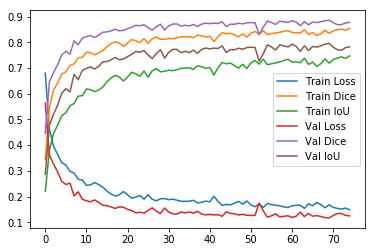

In [5]:
plt.plot(train_loss)
plt.plot(train_fscore)
plt.plot(train_iou)
plt.plot(val_loss)
plt.plot(val_fscore)
plt.plot(val_iou)                                                                                

plt.legend(["Train Loss",  "Train Dice", "Train IoU", "Val Loss", "Val Dice", "Val IoU"])

In [6]:
test_ds = BrainMriSegmentation(stacker.test_df, config.get("stack_size"),
                                transforms=None, preprocessing=get_preprocessing(preprocessing_fn))
test_dl = get_dataloader(test_ds, bs=config.get("batch_size"))

In [7]:
loss = smp.utils.losses.DiceLoss()
metrics = [smp.utils.metrics.IoU(threshold=0.5), smp.utils.metrics.Fscore(threshold=0.5)]
    
test_epoch =  smp.utils.train.ValidEpoch(
    best_model,
    loss=loss,
    metrics=metrics,
    device=config.get("device"),
    verbose=True
)

In [8]:
test_epoch.run(test_dl)

valid: 100%|██████████| 6/6 [00:01<00:00,  4.86it/s, dice_loss - 0.1236, iou_score - 0.7836, fscore - 0.8785]


{'dice_loss': 0.12357193231582642,
 'iou_score': 0.7835729122161865,
 'fscore': 0.8784586091836294}